# Perturbed polynomials

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import math

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import seaborn as sns
matplotlib.rcParams['figure.dpi'] = 125

### Visualizations of root values

Analyzing perturbed coefficients and roots of
$$p(x) = (x-1)(x-2)(x-3)(x-4)(x-5)(x-6)(x-7)(x-8)(x-9)(x-10)$$
Expanding, we have
$$p(x) = x^{10} - 55 x^9 + 1320 x^8 - 18150 x^7 + 157773 x^6 - 902055 x^5 + 3416930 x^4 - 8409500 x^3 + 12753576 x^2 - 10628640 x + 3628800$$
The roots are:

In [4]:
coeff = [1, -55, 1320, -18150, 157773, -902055, 3416930, -8409500, 12753576, -10628640, 3628800]
roots = np.roots(coeff)
print(roots)

[10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]


In [5]:
#a_exp = list(range(-10, 1, 0.5)) # consecutive numbers
a_exp = list(np.arange(-10, 1, 0.5)) # consecutive numbers
a_vals = [0] + list(map(lambda x:pow(10, x), a_exp))
print(a_vals)

[0, 1e-10, 3.1622776601683795e-10, 1e-09, 3.1622776601683795e-09, 1e-08, 3.162277660168379e-08, 1e-07, 3.162277660168379e-07, 1e-06, 3.162277660168379e-06, 1e-05, 3.1622776601683795e-05, 0.0001, 0.00031622776601683794, 0.001, 0.0031622776601683794, 0.01, 0.03162277660168379, 0.1, 0.31622776601683794, 1.0, 3.1622776601683795]


Perturbing coefficients

In [6]:
coeff_ck = coeff[1:]
print(coeff_ck)

[-55, 1320, -18150, 157773, -902055, 3416930, -8409500, 12753576, -10628640, 3628800]


In [7]:
def perturb_coeff(a, coeff):
    coeff_perturbed = []
    for c_k in coeff:
        e_k = np.random.normal(0, 1) # mu = 0, sigma = 1
        coeff_perturbed.append(c_k*(1 + a*e_k))
    return coeff_perturbed

def dist(coeff_ck, new_coeff_ck):
    return [i - j for i, j in zip(new_coeff_ck, coeff_ck)]

def roots_perturb_coeff(perturb_coeff):
    perturb_coeff_full = [1] + perturb_coeff
    return np.roots(perturb_coeff_full)

def real_roots(roots):
    return list(roots.real[abs(roots.imag)<1e-5])

In [8]:
# testing

example_a = 10
example_perturb_coeff = perturb_coeff(example_a, coeff_ck)
example_roots = roots_perturb_coeff(example_perturb_coeff)
example_real_roots = real_roots(example_roots)
print('perturbed coefficients:', example_perturb_coeff, '\n')
print('all roots of perturbed polynomial:', example_roots, '\n')
print('real roots of perturbed polynomial:', example_real_roots)

perturbed coefficients: [126.83305391386244, 3171.9235506614878, 174462.4452188491, -714491.2596309216, 10245489.212854883, -48419980.29991763, 7731672.938885197, 50341466.19665461, -121560619.41051126, 38847813.02313973] 

all roots of perturbed polynomial: [-112.98666875 +0.j           -9.37450491+39.381121j
   -9.37450491-39.381121j      0.16205828 +7.63388095j
    0.16205828 -7.63388095j    4.25220012 +0.j
   -1.46344537 +0.j            0.70812147 +1.02314825j
    0.70812147 -1.02314825j    0.37351041 +0.j        ] 

real roots of perturbed polynomial: [-112.98666875412806, 4.252200115795205, -1.4634453667699194, 0.3735104081742266]


### Plots

In [9]:
a_roots = []
for a in a_vals:
    trial_coeff = perturb_coeff(a, coeff_ck)
    trial_roots = roots_perturb_coeff(trial_coeff)
    trial_real_roots = real_roots(trial_roots)
    a_roots.append(trial_real_roots)

a_roots_df = pd.DataFrame(a_roots)
a_roots_df.insert(0, 'a', a_vals)
a_roots_df.insert(0, 'a_exp', [float('-inf')] + a_exp)
a_roots_df.insert(0, 'a_rounded', a_roots_df['a'].round(2))
print(a_roots_df.shape)
a_roots_df.head(10)

(23, 13)


,a_rounded,a_exp,a,0,1,2,3,4,5,6,7,8,9
0,0.0,-inf,0.000000e+00,10.000000,9.000000,8.000000,7.000000,6.000000,5.000000,4.000000,3.000000,2.000000,1.000000
1,0.0,-10.0,1.000000e-10,9.999966,9.000114,7.999855,7.000088,5.999971,5.000009,3.999996,3.000001,2.000000,1.000000
2,0.0,-9.5,3.162278e-10,9.999862,9.000614,7.998867,7.001106,5.999398,5.000172,3.999983,2.999998,2.000001,1.000000
3,0.0,-9.0,1.000000e-09,9.999819,9.000737,7.998851,7.000891,5.999577,5.000191,3.999913,3.000023,1.999998,1.000000
4,0.0,-8.5,3.162278e-09,10.004399,8.979472,8.038085,6.959737,6.025877,4.990636,4.001973,2.999818,2.000002,1.000000
5,0.0,-8.0,1.000000e-08,10.007968,8.965260,8.057548,6.947048,6.029509,4.991332,4.001447,2.999883,2.000006,1.000000
6,0.0,-7.5,3.162278e-08,9.995993,9.002716,8.027354,6.930595,6.066248,4.970727,4.006980,2.999375,2.000012,1.000000
7,0.0,-7.0,1.000000e-07,9.957006,9.121953,7.876439,6.993249,6.109130,4.913058,4.033988,2.994884,2.000286,0.999999
8,0.0,-6.5,3.162278e-07,10.190712,4.750032,4.020127,3.008161,1.999092,1.000008,NaN,NaN,NaN,NaN
9,0.0,-6.0,1.000000e-06,10.029132,6.517737,3.809366,3.050889,1.996649,1.000065,NaN,NaN,NaN,NaN


In [10]:
a_roots_df_melt = pd.melt(a_roots_df, id_vars=['a', 'a_exp', 'a_rounded'], var_name='roots', value_name='values')
a_roots_df_melt = a_roots_df_melt.sort_values(by=['a'])
print(a_roots_df_melt.shape)
a_roots_df_melt.head()

(230, 5)


,a,a_exp,a_rounded,roots,values
0,0.0,-inf,0.0,0,10.0
23,0.0,-inf,0.0,1,9.0
115,0.0,-inf,0.0,5,5.0
46,0.0,-inf,0.0,2,8.0
92,0.0,-inf,0.0,4,6.0


$a$ versus real root values

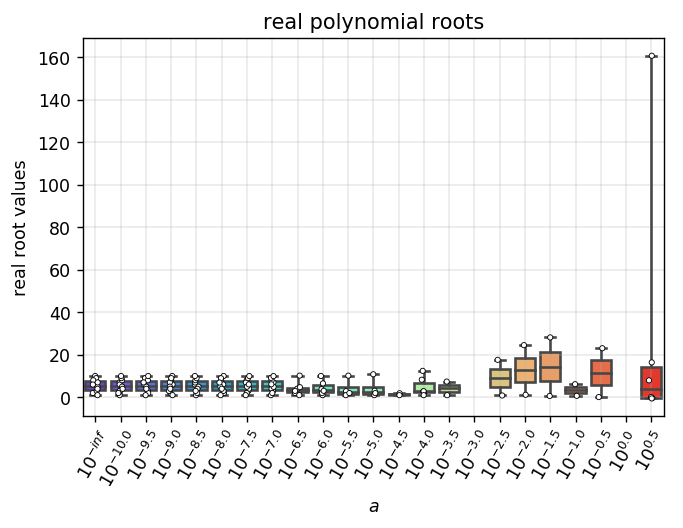

In [11]:
sns.stripplot(x='a_exp', y='values', data=a_roots_df_melt, size=3, color='white', linewidth=0.5, edgecolor='black')

#boxplot = sns.boxplot(x='a_rounded', y='values', data=a_roots_df_melt, whis=np.inf, palette='Set3')
boxplot = sns.boxplot(x='a_exp', y='values', data=a_roots_df_melt, whis=np.inf, palette='rainbow')
boxplot_xticklabels = boxplot.get_xticklabels()
display_xlabels = [{float(str(label.get_text()))} for label in boxplot_xticklabels]
boxplot.set_xticklabels(['$10^{}$'.format(label) for label in display_xlabels], rotation=60, horizontalalignment='center')

#boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=60, horizontalalignment='center')
boxplot.set(xlabel='$a$')
boxplot.set(ylabel='real root values')
boxplot.set(title='real polynomial roots')

plt.grid(linestyle='-', linewidth=0.25)
plt.show()

$a$ versus all root values

In [12]:
a_roots = []
for a in a_vals:
    trial_coeff = perturb_coeff(a, coeff_ck)
    trial_roots = roots_perturb_coeff(trial_coeff) # all roots
    a_roots.append(trial_roots)

a_roots_df = pd.DataFrame(a_roots)
a_roots_df.insert(0, 'a', a_vals)
a_roots_df.insert(0, 'a_exp', [float('-inf')] + a_exp)
#a_roots_df.insert(0, 'a_exp', [-math.inf] + a_exp)
a_roots_df.insert(0, 'a_rounded', a_roots_df['a'].round(2))
print(a_roots_df.shape)

(23, 13)


In [13]:
a_roots_df_melt = pd.melt(a_roots_df, id_vars=['a', 'a_exp', 'a_rounded'], var_name='roots', value_name='values')
a_roots_df_melt = a_roots_df_melt.sort_values(by=['a'])
a_roots_df_melt['real'] = a_roots_df_melt['values'].real
a_roots_df_melt['imaginary'] = a_roots_df_melt['values'].imag

print(a_roots_df_melt.shape)
a_roots_df_melt.head(10)

(230, 7)


,a,a_exp,a_rounded,roots,values,real,imaginary
0,0.0,-inf,0.0,0,(10.000000000340687+0j),10.0,0.0
23,0.0,-inf,0.0,1,(8.99999999849376+0j),9.0,0.0
115,0.0,-inf,0.0,5,(4.999999999494381+0j),5.0,0.0
46,0.0,-inf,0.0,2,(8.000000002751277+0j),8.0,0.0
92,0.0,-inf,0.0,4,(6.000000001506791+0j),6.0,0.0
69,0.0,-inf,0.0,3,(6.999999997320477+0j),7.0,0.0
184,0.0,-inf,0.0,8,(2.00000000000165+0j),2.0,0.0
161,0.0,-inf,0.0,7,(2.999999999983562+0j),3.0,0.0
138,0.0,-inf,0.0,6,(4.000000000107472+0j),4.0,0.0
207,0.0,-inf,0.0,9,(0.99999999999995+0j),1.0,0.0


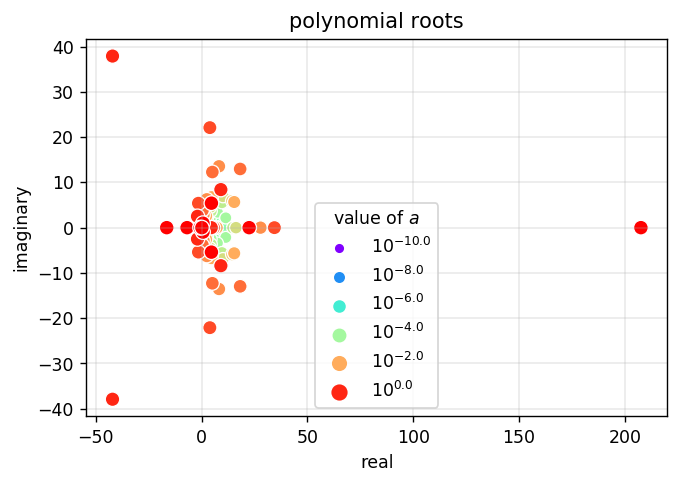

In [14]:
#a_roots_df_melt_nan = a_roots_df_melt.replace(-math.inf, -10.5) # np.nan, for legend to work
a_roots_df_melt_nan = a_roots_df_melt.replace(float('-inf'), np.nan)

cmap = 'rainbow'
#cmap = sns.color_palette('pastel', n_colors=22)
roots_plot = sns.scatterplot(x='real', y='imaginary', data=a_roots_df_melt_nan, 
                             hue='a_exp', size='a_exp', legend='full', palette=cmap)

handles, labels = roots_plot.get_legend_handles_labels()
display_labels = [{float(label)} for label in labels[1::4]]
roots_plot.legend(handles[1::4], ['$10^{}$'.format(label) for label in display_labels], title='value of $a$')
roots_plot.set_title('polynomial roots')

plt.grid(linestyle='-', linewidth=0.25)
plt.show()

### Statistical analyses 

In [15]:
real_avg = a_roots_df_melt.groupby('a_exp')['real'].mean().reset_index().rename(columns={'real':'real_avg'})
real_std = a_roots_df_melt.groupby('a_exp')['real'].std().reset_index().rename(columns={'real':'real_std'})
imag_avg = a_roots_df_melt.groupby('a_exp')['imaginary'].mean().reset_index().rename(columns={'imaginary':'imag_avg'})
imag_std = a_roots_df_melt.groupby('a_exp')['imaginary'].std().reset_index().rename(columns={'imaginary':'imag_std'})

a_roots_df_melt_stats = pd.concat([real_avg, real_std, imag_avg, imag_std], axis=1)
a_roots_df_melt_stats = a_roots_df_melt_stats.loc[:,~a_roots_df_melt_stats.columns.duplicated()]

print(a_roots_df_melt_stats.shape)
a_roots_df_melt_stats.head(10)

(23, 5)


,a_exp,real_avg,real_std,imag_avg,imag_std
0,-inf,5.500000,3.027650,0.0,0.000000
1,-10.0,5.500000,3.027650,0.0,0.000000
2,-9.5,5.500000,3.027650,0.0,0.000000
3,-9.0,5.500000,3.027650,0.0,0.000000
4,-8.5,5.500000,3.027650,0.0,0.000000
5,-8.0,5.500000,3.027650,0.0,0.000000
6,-7.5,5.500000,3.027651,0.0,0.000000
7,-7.0,5.499999,3.027632,0.0,0.000000
8,-6.5,5.500003,3.047853,0.0,0.349973
9,-6.0,5.499995,3.046253,0.0,0.336926


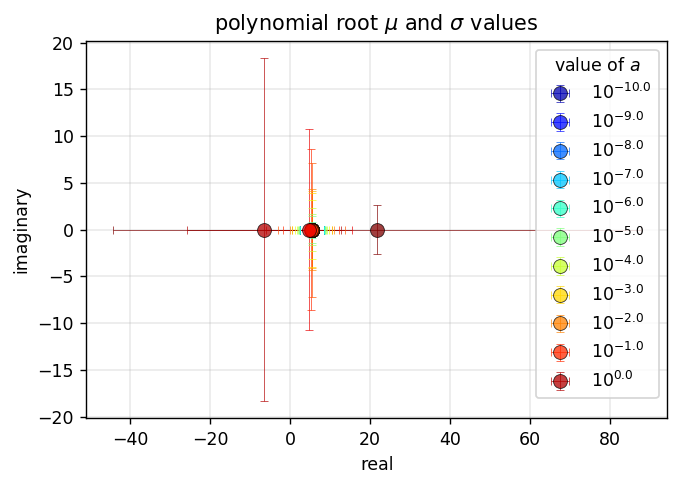

In [16]:
x, y = list(a_roots_df_melt_stats['real_avg']), list(a_roots_df_melt_stats['imag_avg'])
x_err, y_err = list(a_roots_df_melt_stats['real_std']), list(a_roots_df_melt_stats['imag_std'])
labels = list(a_roots_df_melt_stats['a_exp'])
float_labels = [{float(label)} for label in labels]
display_labels = ['$10^{}$'.format(label) for label in float_labels]

#plt.errorbar(x, y, yerr=y_err, xerr=x_err, elinewidth=0.5, capsize=2.5, ms=4, 
#             markerfacecolor='black', markeredgecolor='black', fmt='o', ecolor='blue')

n = len(x)
colors = pl.cm.jet(np.linspace(0,1,n))
for i in range(n):
    plt.errorbar(x[i], y[i], yerr=y_err[i], xerr=x_err[i], elinewidth=0.5, capsize=2.5, ms=8,
                 markerfacecolor=colors[i], markeredgecolor='black', markeredgewidth=0.5, 
                 fmt='o', ecolor=colors[i], alpha=0.75,
                 label='_nolegend_' if (i+1)%2 != 0 else display_labels[i]) #label=display_labels[i]
    
plt.xlabel('real')
plt.ylabel('imaginary')
plt.title('polynomial root $\mu$ and $\sigma$ values') # mean and standard deviations of roots by 'a' value
plt.grid(linestyle='-', linewidth=0.25)
plt.legend(title='value of $a$')
plt.show()

In [17]:
stats_melt = pd.melt(a_roots_df_melt_stats, id_vars='a_exp', var_name='statistic', value_name='val')
print(stats_melt.shape)
stats_melt.head()

(92, 3)


,a_exp,statistic,val
0,-inf,real_avg,5.5
1,-10.0,real_avg,5.5
2,-9.5,real_avg,5.5
3,-9.0,real_avg,5.5
4,-8.5,real_avg,5.5


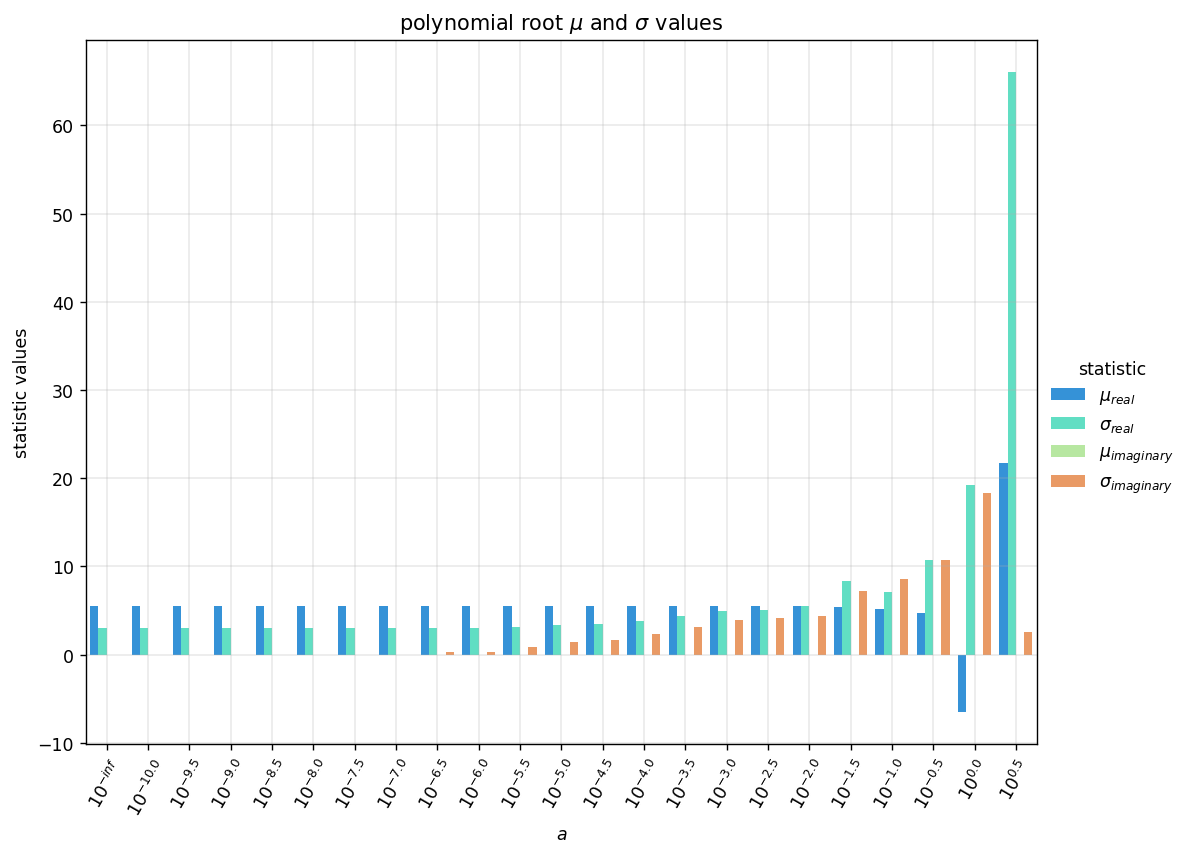

In [18]:
# for legend
stats_melt = stats_melt.replace('real_avg', '$\mu_{real}$')
stats_melt = stats_melt.replace('real_std', '$\sigma_{real}$')
stats_melt = stats_melt.replace('imag_avg', '$\mu_{imaginary}$')
stats_melt = stats_melt.replace('imag_std', '$\sigma_{imaginary}$')

# 'boxplot/display_xticklabels' because 'FacetGrid' object has no attribute 'get_xticklabels' 
barplot = sns.catplot(x='a_exp', y='val', hue='statistic', data=stats_melt, 
                      kind='bar', palette='rainbow', height=6.4, aspect=4/3)
barplot.set_xticklabels(['$10^{}$'.format(label) for label in display_xlabels], rotation=60, horizontalalignment='center')
barplot.set(xlabel='$a$')
barplot.set(ylabel='statistic values')
barplot.set(title='polynomial root $\mu$ and $\sigma$ values')

sns.despine(top=False, right=False)
plt.grid(linestyle='-', linewidth=0.25)
plt.show()